In [347]:
import pandas as pd
import numpy as np
import seaborn as sns #built on matplot

import matplotlib.pyplot as plt #basic visualization
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0) 

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [348]:
df_weather = pd.read_csv('weather_data.csv')
df_weather.drop('Unnamed: 0', axis =1, inplace = True)

# Drop null values
df_weather.dropna(inplace= True)

In [349]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13264 entries, 0 to 13289
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    13264 non-null  object 
 1   temperature  13264 non-null  float64
 2   description  13264 non-null  object 
dtypes: float64(1), object(2)
memory usage: 414.5+ KB


In [351]:
df_weather

,timestamp,temperature,description
0,2020-02-01 00:50:00,11.0,Passing clouds
1,2020-02-01 01:50:00,11.0,Partly cloudy
2,2020-02-01 02:50:00,11.0,Passing clouds
3,2020-02-01 03:50:00,11.0,Partly cloudy
4,2020-02-01 04:50:00,10.0,Passing clouds
...,...,...,...
13285,2021-03-31 20:20:00,17.0,Clear
13286,2021-03-31 20:50:00,15.0,Passing clouds
13287,2021-03-31 21:50:00,13.0,Passing clouds
13288,2021-03-31 22:50:00,12.0,Overcast


In [352]:
df_weather.describe()

,temperature
count,13264.000000
mean,10.994723
std,6.391094
min,-5.000000
25%,7.000000
50%,10.000000
75%,15.000000
max,37.000000


### Add date/time features

In [353]:
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_weather['year'] = df_weather.timestamp.dt.year
df_weather['month'] = df_weather.timestamp.dt.month
df_weather['day_of_week'] = df_weather.timestamp.dt.day_of_week
df_weather['hour'] = df_weather.timestamp.dt.hour

In [354]:
df_weather.head()

,timestamp,temperature,description,year,month,day_of_week,hour
0,2020-02-01 00:50:00,11.0,Passing clouds,2020,2,5,0
1,2020-02-01 01:50:00,11.0,Partly cloudy,2020,2,5,1
2,2020-02-01 02:50:00,11.0,Passing clouds,2020,2,5,2
3,2020-02-01 03:50:00,11.0,Partly cloudy,2020,2,5,3
4,2020-02-01 04:50:00,10.0,Passing clouds,2020,2,5,4


### Correlation

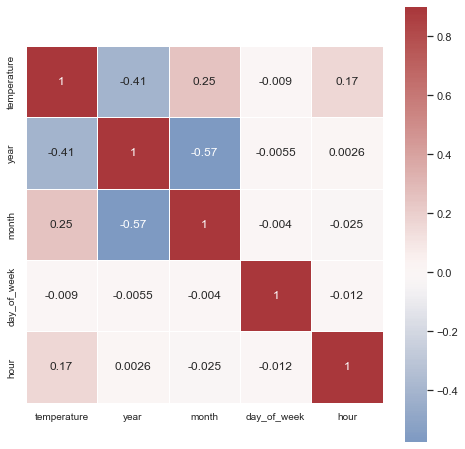

In [359]:
# Get Correlation Matrix
corrmat = df_weather.corr()
corrmat
plt.rcParams["figure.figsize"] = (8,8)
sns. set(font_scale=1)
x = sns.heatmap(corrmat, annot=True,  cmap='vlag', center = 0,  vmax=.9, square=True, linewidths=1)
x.tick_params(labelsize=10)

### Feature Frequency Distributions

In [360]:
df_weather.columns

Index(['timestamp', 'temperature', 'description', 'year', 'month',
       'day_of_week', 'hour'],
      dtype='object')

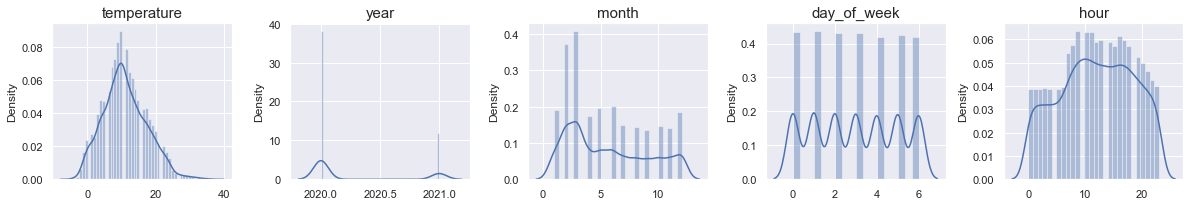

In [361]:
list = [#'timestamp', 'description',
        'temperature',  'year', 'month',
       'day_of_week', 'hour']

plt.rcParams["figure.figsize"] = (20,8)

df_forplot = df_weather.loc[:,df_weather.select_dtypes(include = ['int', 'float']).columns]

i=0
for var in list:
    i=i+1
    plt.subplot(3,6,i)
    sns.distplot(df_forplot[[var]])
    plt.title(var, fontdict = {'fontsize':15})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [363]:
df_weather.describe()

,temperature,year,month,day_of_week,hour
count,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000
mean,10.994723,2020.236203,5.610374,2.974442,11.964113
std,6.391094,0.424765,3.466108,1.999969,6.419964
min,-5.000000,2020.000000,1.000000,0.000000,0.000000
25%,7.000000,2020.000000,3.000000,1.000000,7.000000
50%,10.000000,2020.000000,5.000000,3.000000,12.000000
75%,15.000000,2020.000000,8.000000,5.000000,17.000000
max,37.000000,2021.000000,12.000000,6.000000,23.000000


### Relationship of Temp by dates

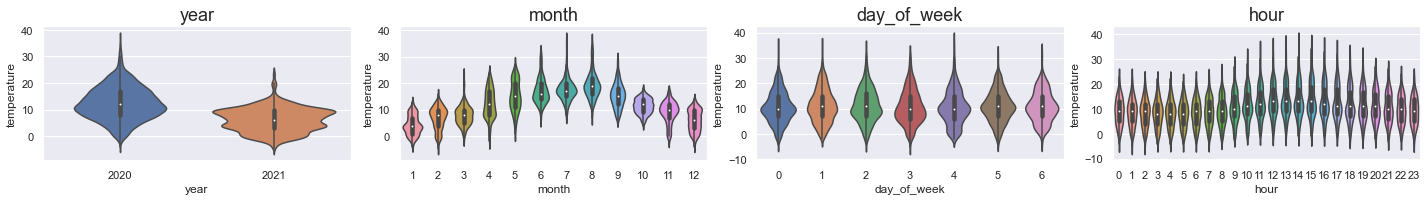

In [364]:
list = ['year', 'month', 'day_of_week', 'hour']
plt.rcParams["figure.figsize"] = (20,5)

i=0
for var2 in ['temperature']:
    for var in list:
        i=i+1
        plt.subplot(2,4,i)
        sns.violinplot(data=df_weather, x=var, y=var2)
        plt.title(var, fontdict = {'fontsize':18})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

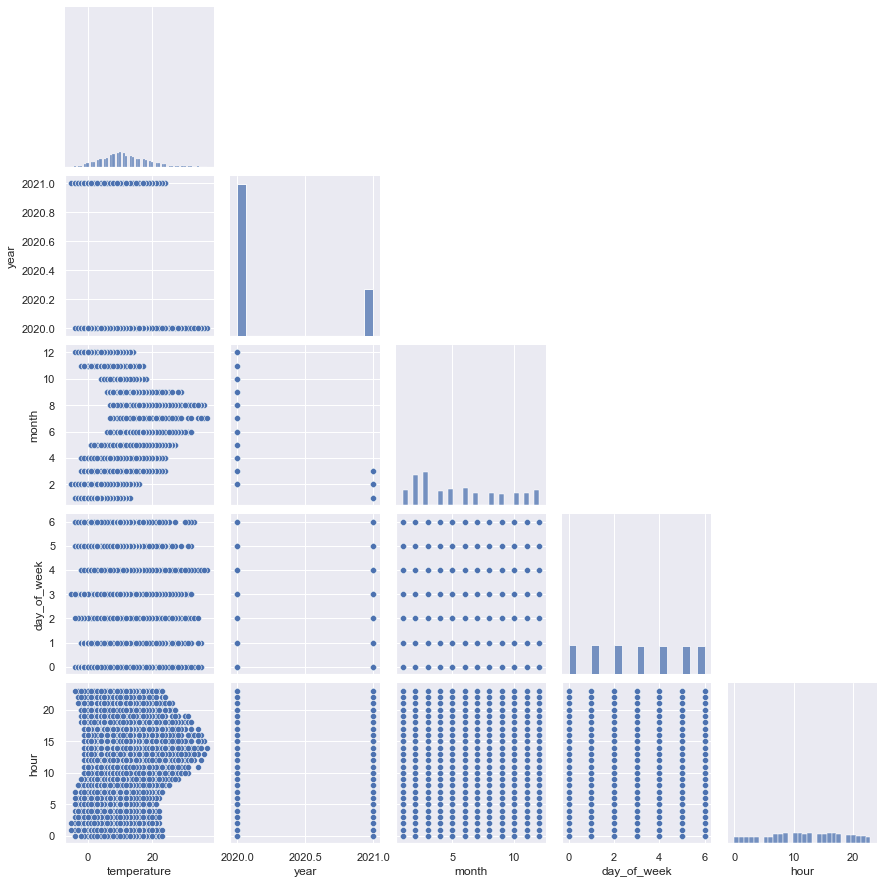

In [367]:
sns.pairplot(df_weather, corner = True)

### Weather description

In [368]:
df_weather.description.unique()

array(['Passing clouds', 'Partly cloudy', 'Partly sunny',
       'Scattered clouds', 'Sprinkles. Scattered clouds', 'Clear',
       'Overcast', 'Drizzle. Low clouds', 'Drizzle. Mostly cloudy', 'Fog',
       'Broken clouds', 'Mostly cloudy', 'Sunny',
       'Light rain. Broken clouds', 'Ice fog', 'Haze',
       'Light rain. Mostly cloudy', 'Light rain. Overcast',
       'More clouds than sun', 'Light rain. More clouds than sun',
       'Drizzle. Cloudy', 'Thunderstorms. Cloudy', 'Rain. Cloudy',
       'Light rain. Cloudy', 'Lots of rain. Cloudy',
       'Rain showers. Broken clouds', 'Rain. Partly cloudy',
       'Sprinkles. Broken clouds', 'Sprinkles. Mostly cloudy',
       'Sprinkles. Partly sunny', 'Rain showers. Passing clouds',
       'Lots of rain. Partly cloudy', 'Rain showers. Partly cloudy',
       'Sprinkles. Passing clouds', 'Scattered showers. Partly sunny',
       'Drizzle. Partly sunny', 'Low clouds', 'Light rain. Partly sunny',
       'Rain. Mostly cloudy', 'Rain. Broken 

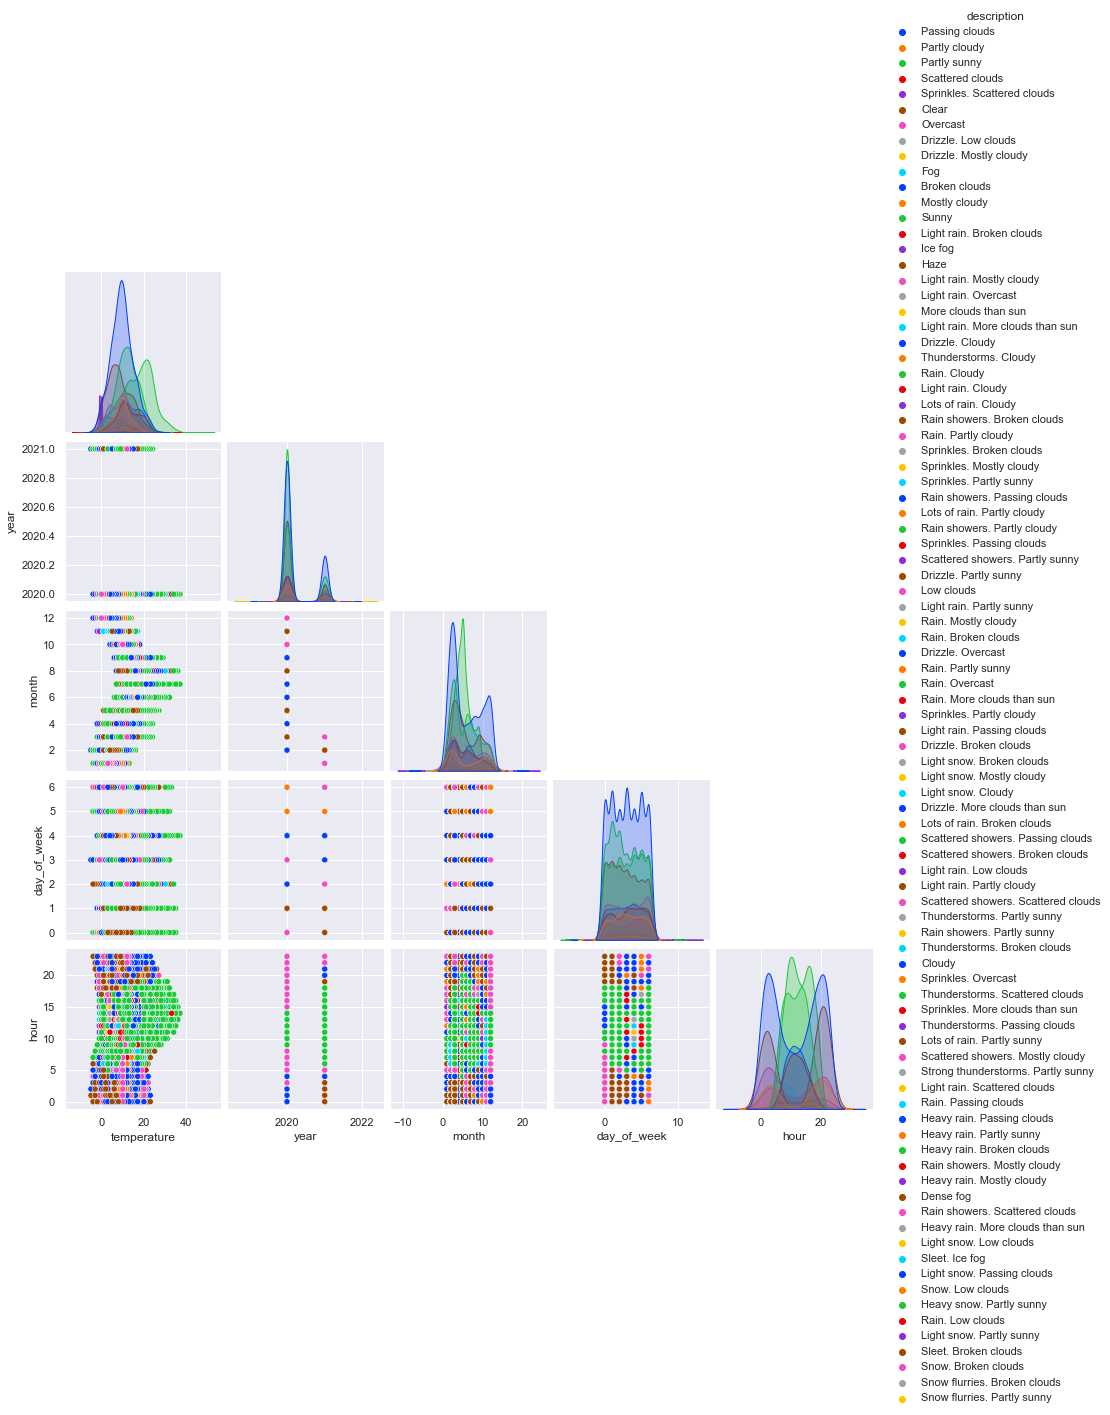

In [370]:
sns.pairplot(df_weather, hue = 'description', palette= 'bright', corner = True)

### Mapping of weathers

In [371]:
list_sunny =['Partly sunny',  'Clear', 'Sunny']

In [372]:
list_cloudy =['Passing clouds', 'Partly cloudy', 
        'Scattered clouds', 'Sprinkles. Scattered clouds', 
       'Overcast', 'Drizzle. Low clouds', 'Drizzle. Mostly cloudy', 'Fog',
       'Broken clouds', 'Mostly cloudy', 
       'More clouds than sun', 
       'Drizzle. Cloudy', 'Cloudy', 'Low clouds']

In [373]:
list_rainy = ['Heavy rain. Passing clouds', 'Heavy rain. Partly sunny',
       'Heavy rain. Broken clouds', 'Rain showers. Mostly cloudy',
       'Heavy rain. Mostly cloudy', 'Dense fog',
       'Rain showers. Scattered clouds', 'Rain. Low clouds',
       'Heavy rain. More clouds than sun', 'Light rain. Broken clouds',  
       'Light rain. Mostly cloudy', 'Light rain. Overcast',
       'Light rain. More clouds than sun', 'Thunderstorms. Cloudy', 'Rain. Cloudy',
       'Light rain. Cloudy', 'Lots of rain. Cloudy',
       'Rain showers. Broken clouds', 'Rain. Partly cloudy',
       'Sprinkles. Broken clouds', 'Sprinkles. Mostly cloudy',
       'Sprinkles. Partly sunny', 'Rain showers. Passing clouds',
       'Lots of rain. Partly cloudy', 'Rain showers. Partly cloudy',
       'Sprinkles. Passing clouds','Drizzle. Partly sunny', 'Rain. Mostly cloudy', 
       'Rain. Broken clouds', 'Drizzle. Overcast',
       'Rain. Partly sunny', 'Rain. Overcast',
       'Rain. More clouds than sun', 'Sprinkles. Partly cloudy',
       'Light rain. Passing clouds', 'Drizzle. Broken clouds', 'Lots of rain. Broken clouds', 
       'Scattered showers. Passing clouds',
       'Scattered showers. Broken clouds', 'Light rain. Low clouds',
       'Light rain. Partly cloudy', 'Scattered showers. Scattered clouds',
       'Thunderstorms. Partly sunny', 'Rain showers. Partly sunny',
       'Thunderstorms. Broken clouds', 'Drizzle. More clouds than sun', 'Thunderstorms. Scattered clouds',
       'Sprinkles. More clouds than sun', 'Thunderstorms. Passing clouds',
       'Lots of rain. Partly sunny', 'Scattered showers. Mostly cloudy',
       'Strong thunderstorms. Partly sunny',
       'Light rain. Scattered clouds', 'Rain. Passing clouds',  'Sprinkles. Overcast', 
       'Light rain. Partly sunny', 'Scattered showers. Partly sunny']

In [374]:
list_snow = ['Light snow. Low clouds',
       'Sleet. Ice fog', 'Light snow. Passing clouds', 'Snow. Low clouds',
       'Heavy snow. Partly sunny', 
       'Light snow. Partly sunny', 'Sleet. Broken clouds',
       'Snow. Broken clouds', 'Snow flurries. Broken clouds',
       'Snow flurries. Partly sunny', 'Light snow. Low clouds',
       'Sleet. Ice fog', 'Ice fog', 'Light snow. Broken clouds', 'Light snow. Mostly cloudy',
       'Light snow. Cloudy']

In [380]:
df_weather.description.replace(list_rainy, 'rainy', inplace = True)  
df_weather.description.replace(list_snow, 'snow', inplace = True) 
df_weather.description.replace(list_cloudy, 'cloudy', inplace = True)  
df_weather.description.replace(list_sunny, 'sunny', inplace = True) 
df_weather.description.replace(['Haze'], 'haze', inplace = True) 

In [381]:
df_weather.description.unique()

array(['cloudy', 'sunny', 'rainy', 'snow', 'haze'], dtype=object)

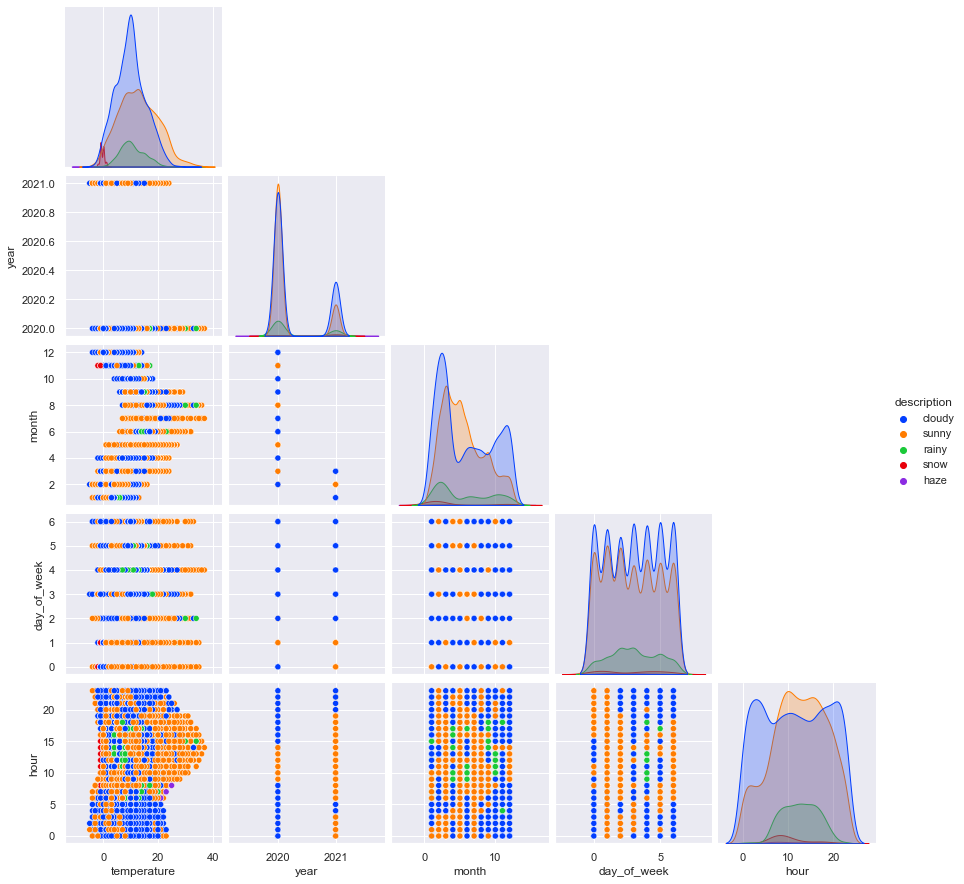

In [382]:
sns.pairplot(df_weather, 
             hue = 'description', palette= 'bright', corner = True)

## CHECK January - March 2020 & 2021

In [383]:
check = df_weather.loc[df_weather['month']<=3]

In [384]:
check

,timestamp,temperature,description,year,month,day_of_week,hour
0,2020-02-01 00:50:00,11.0,cloudy,2020,2,5,0
1,2020-02-01 01:50:00,11.0,cloudy,2020,2,5,1
2,2020-02-01 02:50:00,11.0,cloudy,2020,2,5,2
3,2020-02-01 03:50:00,11.0,cloudy,2020,2,5,3
4,2020-02-01 04:50:00,10.0,cloudy,2020,2,5,4
...,...,...,...,...,...,...,...
13285,2021-03-31 20:20:00,17.0,sunny,2021,3,2,20
13286,2021-03-31 20:50:00,15.0,cloudy,2021,3,2,20
13287,2021-03-31 21:50:00,13.0,cloudy,2021,3,2,21
13288,2021-03-31 22:50:00,12.0,cloudy,2021,3,2,22


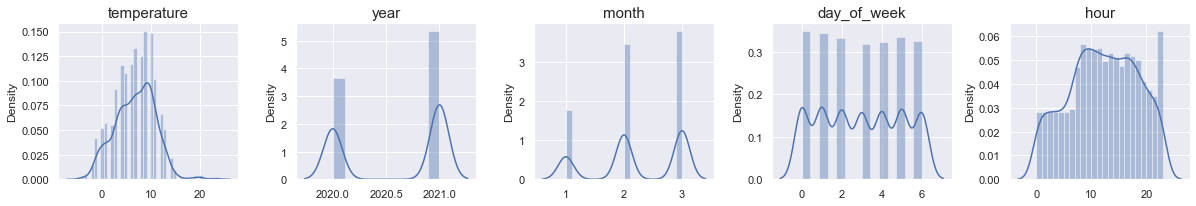

In [385]:
list = [#'timestamp', 'description',
        'temperature',  'year', 'month',
       'day_of_week', 'hour']

plt.rcParams["figure.figsize"] = (20,8)

df_forplot = check.loc[:,check.select_dtypes(include = ['int', 'float']).columns]

i=0
for var in list:
    i=i+1
    plt.subplot(3,6,i)
    sns.distplot(df_forplot[[var]])
    plt.title(var, fontdict = {'fontsize':15})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [386]:
df_weather.describe()

,temperature,year,month,day_of_week,hour
count,13264.000000,13264.000000,13264.000000,13264.000000,13264.000000
mean,10.994723,2020.236203,5.610374,2.974442,11.964113
std,6.391094,0.424765,3.466108,1.999969,6.419964
min,-5.000000,2020.000000,1.000000,0.000000,0.000000
25%,7.000000,2020.000000,3.000000,1.000000,7.000000
50%,10.000000,2020.000000,5.000000,3.000000,12.000000
75%,15.000000,2020.000000,8.000000,5.000000,17.000000
max,37.000000,2021.000000,12.000000,6.000000,23.000000


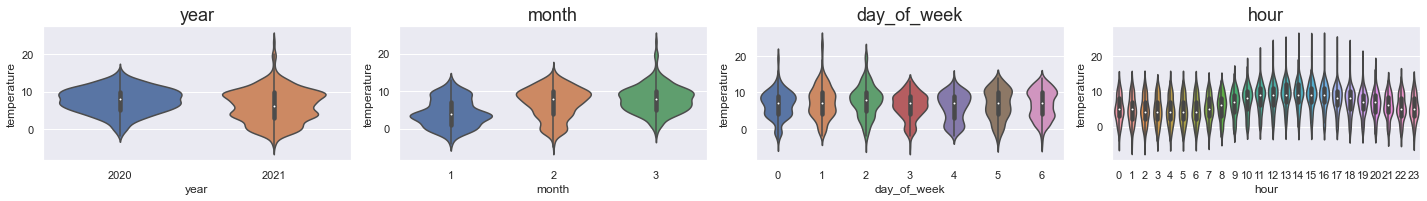

In [387]:
list = ['year', 'month', 'day_of_week', 'hour']
plt.rcParams["figure.figsize"] = (20,5)

i=0
for var2 in ['temperature']:
    for var in list:
        i=i+1
        plt.subplot(2,4,i)
        sns.violinplot(data=check, x=var, y=var2)
        plt.title(var, fontdict = {'fontsize':18})
    
plt.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

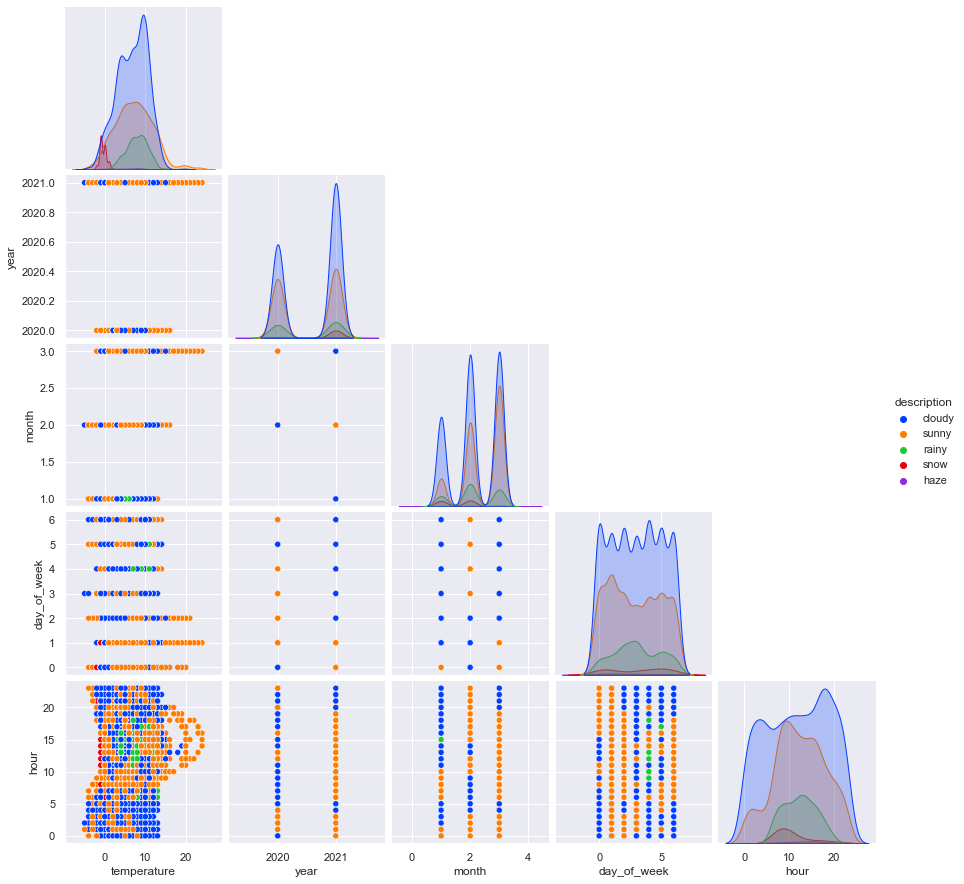

In [388]:
sns.pairplot(check, 
             hue = 'description', palette= 'bright', corner = True)

In [389]:
check

,timestamp,temperature,description,year,month,day_of_week,hour
0,2020-02-01 00:50:00,11.0,cloudy,2020,2,5,0
1,2020-02-01 01:50:00,11.0,cloudy,2020,2,5,1
2,2020-02-01 02:50:00,11.0,cloudy,2020,2,5,2
3,2020-02-01 03:50:00,11.0,cloudy,2020,2,5,3
4,2020-02-01 04:50:00,10.0,cloudy,2020,2,5,4
...,...,...,...,...,...,...,...
13285,2021-03-31 20:20:00,17.0,sunny,2021,3,2,20
13286,2021-03-31 20:50:00,15.0,cloudy,2021,3,2,20
13287,2021-03-31 21:50:00,13.0,cloudy,2021,3,2,21
13288,2021-03-31 22:50:00,12.0,cloudy,2021,3,2,22


In [390]:
check.description.replace(list_cloudy, 'cloudy', inplace = True)   
check.description.replace(list_sunny, 'sunny', inplace = True)   
check.description.replace(list_rainy, 'rainy', inplace = True)  
check.description.replace(list_snow, 'snow', inplace = True)  
check.description.replace(['Haze'], 'Haze', inplace = True) 

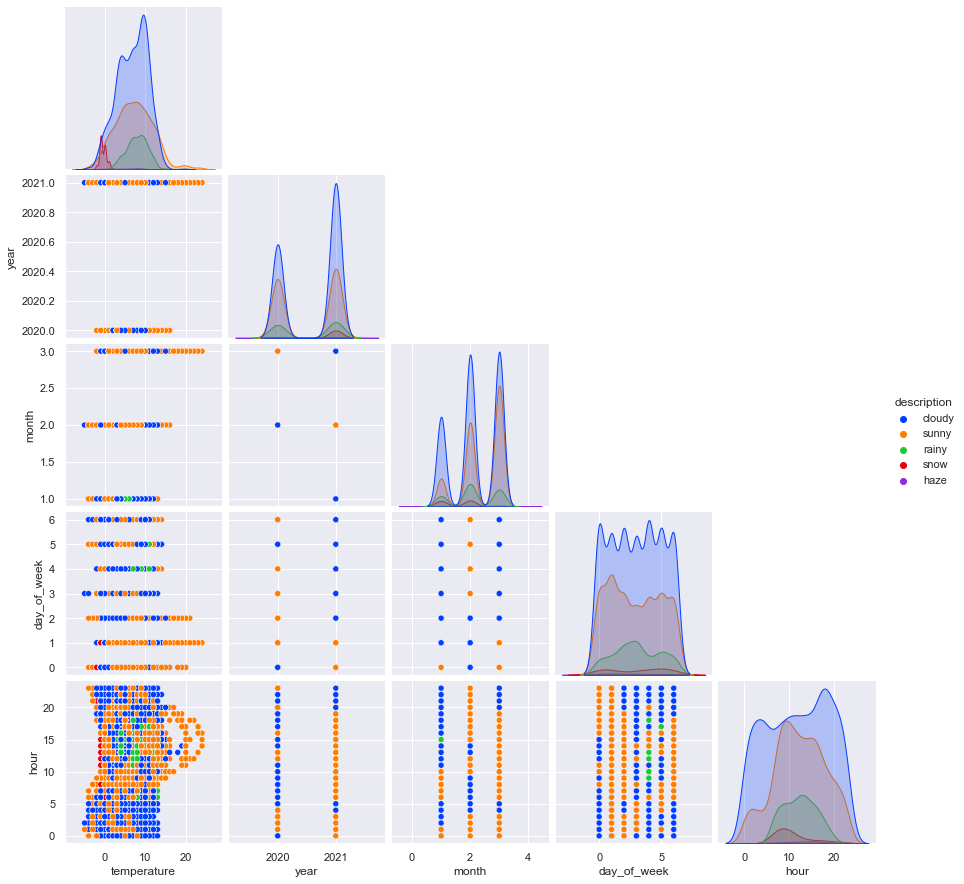

In [391]:
sns.pairplot(check, 
             hue = 'description', palette= 'bright', corner = True)

## CHECK  -- end --